In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

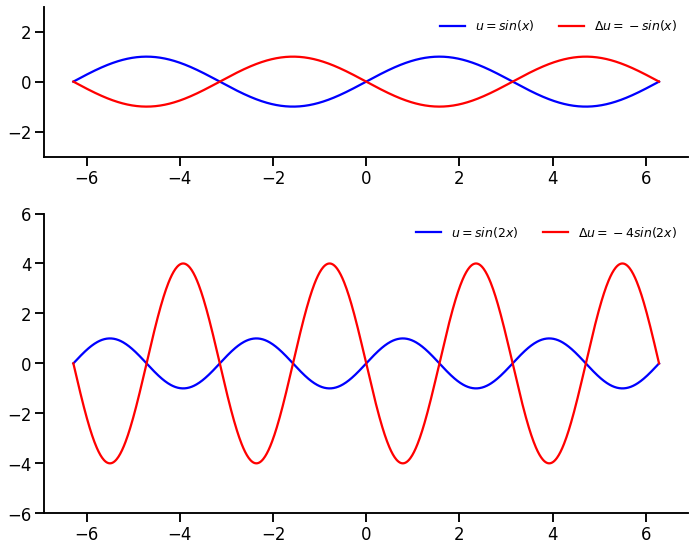

In [73]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
u = np.sin(x)
Lu = -np.sin(x)

fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw=dict(height_ratios=(1,2)))
axes[0].plot(x,    np.sin(x), color='blue', label='$u = sin(x)$')
axes[0].plot(x,   -np.sin(x), color='red', label='$\Delta u = -sin(x)$')
axes[1].plot(x,    np.sin(2*x), color='blue', label='$u = sin(2x)$')
axes[1].plot(x, -4*np.sin(2*x), color='red', label='$\Delta u = -4 sin(2x)$')

axes[0].set_ylim(-3, 3)
axes[1].set_ylim(-6, 6)
for ax in axes:
    ax.legend(frameon=False, ncol=2, bbox_to_anchor=(1,1), loc='upper right', fontsize='x-small')
sns.despine(fig)
fig.tight_layout()
fig.savefig('laplacian_plot.png', bbox_inches='tight', dpi=400)

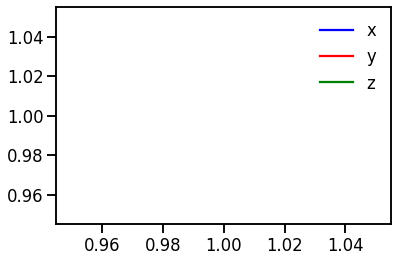

In [76]:
x = np.ones(10)

plt.plot(x, x, color='blue', label='x')
plt.plot(x, x, color='red', label='y')
plt.plot(x, x, color='green', label='z')
plt.legend(frameon=False)
plt.savefig('stencil_legend.png', dpi=400)

In [31]:
%pwd

'C:\\Users\\mtr22\\Code'

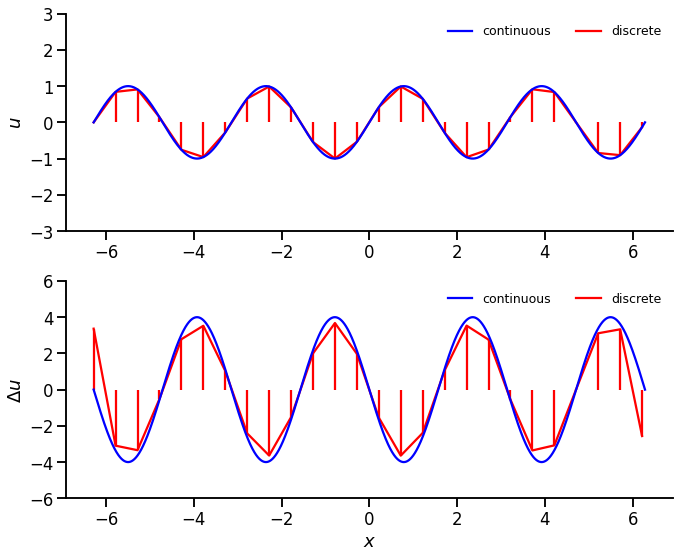

In [152]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

def tridiag(a, b, c, n):
    '''
    Create a tridiagonal matrix.
    '''
    return (
        a * (np.tri(N=n, k=-1) - np.tri(N=n, k=-2)) +
        b * np.eye(n) +
        c * (np.tri(N=n, k=1) - np.tri(N=n, k=0))
    )

h = 0.5
x_cont = np.linspace(-2*np.pi, 2*np.pi, 10000)
x_disc = np.arange(-2*np.pi, 2*np.pi, h)
n = len(x_disc)

freq = 2
u_cont = lambda x: np.sin(freq*x)
u_disc = np.sin(freq*x_disc)

error = lambda x, y: np.abs(x - y)

ax = axes[0]
ax.plot(x_cont, u_cont(x_cont), color='blue', label='continuous', zorder=10)
ax.plot(x_disc, u_disc, color='red', label='discrete')
ax.vlines(x_disc, 0, u_disc, color='red')
ax.set_ylabel('$u$')
ax.set_ylim(-3, 3)

# Laplacian matrix
L = tridiag(1, -2, 1, n)

Lu_cont = lambda x: -freq**2 * np.sin(freq*x)
Lu_disc = L @ u_disc / h**2

ax = axes[1]
ax.plot(x_cont, Lu_cont(x_cont), color='blue', label='continuous', zorder=10)
ax.plot(x_disc, Lu_disc, color='red', label='discrete')
ax.vlines(x_disc, 0, Lu_disc, color='red')
ax.set_ylabel('$\Delta u$')
ax.set_xlabel('$x$')
ax.set_ylim(-6, 6)

for ax in axes:
    
    ax.legend(frameon=False, ncol=2, bbox_to_anchor=(1,1), loc='upper right', fontsize='x-small')

sns.despine(fig)
fig.tight_layout()
fig.savefig('discrete_continuous.png', bbox_inches='tight', dpi=400)

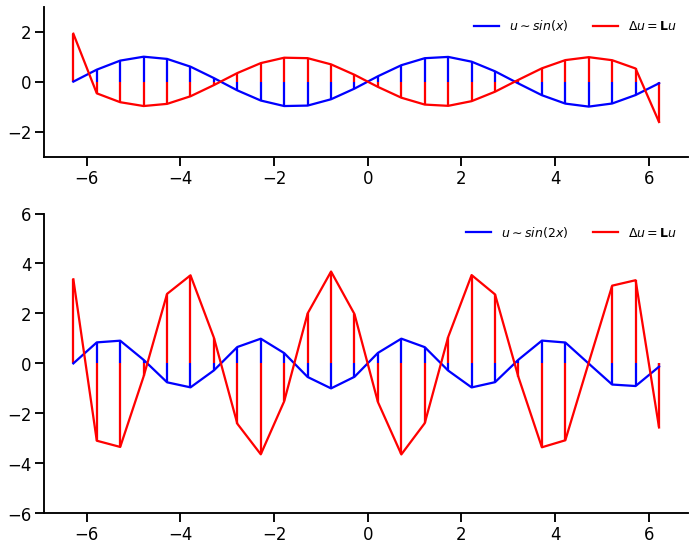

In [159]:
h = 0.5
x = np.arange(-2*np.pi, 2*np.pi, h)
n = len(x_disc)

# Laplacian matrix
L = tridiag(1, -2, 1, n)

u = np.sin(x)
Lu = L @ u / h**2

fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw=dict(height_ratios=(1,2)))
axes[0].plot(x, u, color='blue', label='$u \sim sin(x)$')
axes[0].plot(x, Lu, color='red', label='$\Delta u = \mathbf{L} u$')
axes[0].vlines(x, 0, u, color='blue')
axes[0].vlines(x, 0, Lu, color='red')

u = np.sin(2*x)
Lu = L @ u / h**2

axes[1].plot(x, u, color='blue', label='$u \sim sin(2x)$')
axes[1].plot(x, Lu, color='red', label='$\Delta u = \mathbf{L} u$')
axes[1].vlines(x, 0, u, color='blue')
axes[1].vlines(x, 0, Lu, color='red')

axes[0].set_ylim(-3, 3)
axes[1].set_ylim(-6, 6)
for ax in axes:
    ax.legend(frameon=False, ncol=2, bbox_to_anchor=(1,1), loc='upper right', fontsize='x-small')
sns.despine(fig)
fig.tight_layout()
fig.savefig('discrete_plot.png', bbox_inches='tight', dpi=400)

In [142]:
L

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0